<a href="https://colab.research.google.com/github/SahilLokhande2604/Crop_Yield_Prediction/blob/main/FeatureExtractionUsingSHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import shap

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/B-tech_Project/Yield_Prediction/datasets/dataset1/crop_yield.csv')

# Preprocessing: Encode categorical variables (Crop, Season, State)
label_encoders = {}
for col in ['Crop', 'Season', 'State']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define the features (X) and the target variables (Production and Yield)
X = data.drop(columns=['Production', 'Yield'])
y_production = data['Production']
y_yield = data['Yield']

# Split data into train and test sets for both production and yield
X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(X, y_production, test_size=0.2, random_state=42)
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y_yield, test_size=0.2, random_state=42)


In [ ]:

# Train a RandomForestRegressor model for Production
rf_model_prod = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_prod.fit(X_train_prod, y_train_prod)



RandomForestRegressor(random_state=42)

In [ ]:
# Train a RandomForestRegressor model for Yield
rf_model_yield = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_yield.fit(X_train_yield, y_train_yield)


RandomForestRegressor(random_state=42)

In [ ]:

# Use KernelExplainer with a smaller background dataset and fewer samples to explain
# background_data = shap.kmeans(X_train_prod, 100) # Subsample background using k-means clustering
background_data = shap.sample(X_train_prod, 100) # Subsample background using random sampling

explainer_prod = shap.KernelExplainer(rf_model_prod.predict, background_data)
shap_values_prod = explainer_prod.shap_values(X_train_prod.sample(100)) # Explain only 100 samples

  0%|          | 0/100 [00:00<?, ?it/s]

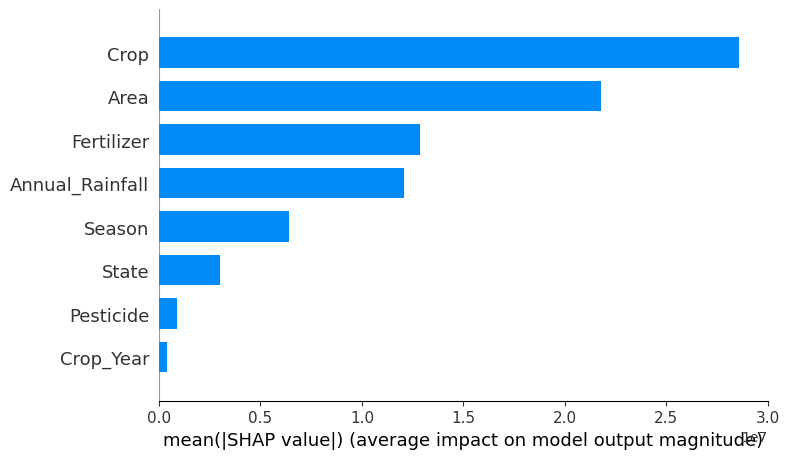

In [ ]:
# Plotting feature importance for Production
shap.summary_plot(shap_values_prod, X_train_prod, plot_type="bar")

In [ ]:

# Use KernelExplainer with a smaller background dataset and fewer samples to explain
# background_data = shap.kmeans(X_train_prod, 100) # Subsample background using k-means clustering
background_data = shap.sample(X_train_yield, 100) # Subsample background using random sampling

explainer_yield = shap.KernelExplainer(rf_model_yield.predict, background_data)
shap_values_yield = explainer_yield.shap_values(X_train_yield.sample(100)) # Explain only 100 samples

  0%|          | 0/100 [00:00<?, ?it/s]

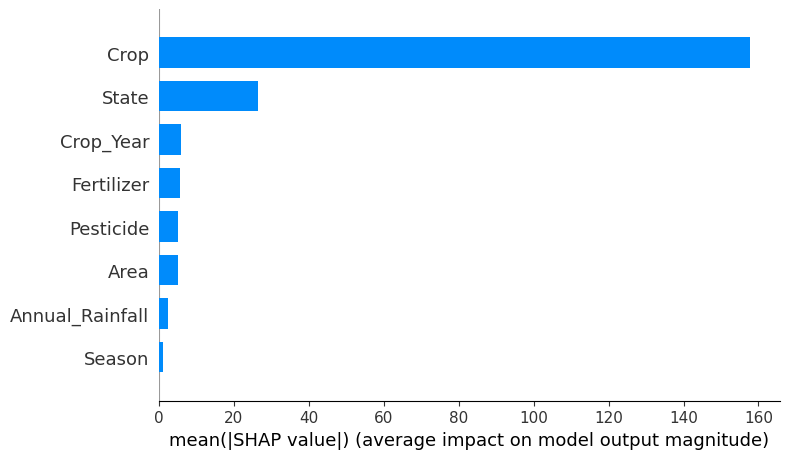

In [ ]:
# Plotting feature importance for Yield
shap.summary_plot(shap_values_yield, X_train_yield, plot_type="bar")


In [ ]:
# Use KernelExplainer with a smaller background dataset to explain all data points
# background_data = shap.kmeans(X_train_prod, 100) # Subsample background using k-means clustering
background_data = shap.sample(X_train_prod, 100) # Subsample background using random sampling

explainer_prod = shap.KernelExplainer(rf_model_prod.predict, background_data)
# Calculate SHAP values for all rows of X_train_prod
shap_values_prod = explainer_prod.shap_values(X_train_prod)

  0%|          | 0/15751 [00:00<?, ?it/s]

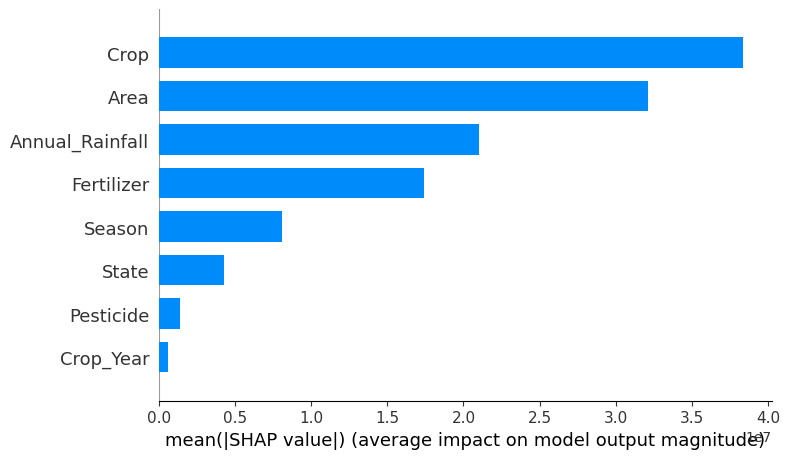

In [ ]:
# Plotting feature importance for Production
shap.summary_plot(shap_values_prod, X_train_prod, plot_type="bar")

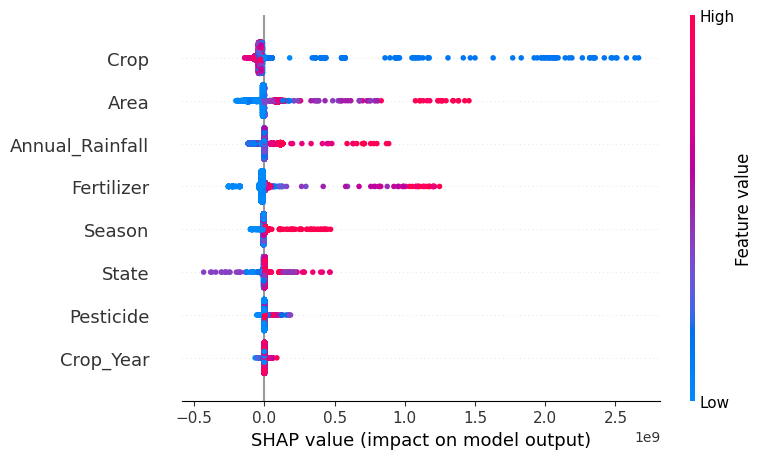

In [ ]:
shap.summary_plot(shap_values_prod, X_train_prod)

In [ ]:
# Create a dictionary to store the mappings
encoded_value_mappings = {}

# For each encoded column, get the mapping of encoded values to the original labels
for col in ['Crop', 'Season', 'State']:
    encoded_value_mappings[col] = dict(enumerate(label_encoders[col].classes_))

# Display the mappings
for col, mapping in encoded_value_mappings.items():
    print(f"Mapping for {col}:")
    print(mapping)
    print("\n")


Mapping for Crop:
{0: 'Arecanut', 1: 'Arhar/Tur', 2: 'Bajra', 3: 'Banana', 4: 'Barley', 5: 'Black pepper', 6: 'Cardamom', 7: 'Cashewnut', 8: 'Castor seed', 9: 'Coconut ', 10: 'Coriander', 11: 'Cotton(lint)', 12: 'Cowpea(Lobia)', 13: 'Dry chillies', 14: 'Garlic', 15: 'Ginger', 16: 'Gram', 17: 'Groundnut', 18: 'Guar seed', 19: 'Horse-gram', 20: 'Jowar', 21: 'Jute', 22: 'Khesari', 23: 'Linseed', 24: 'Maize', 25: 'Masoor', 26: 'Mesta', 27: 'Moong(Green Gram)', 28: 'Moth', 29: 'Niger seed', 30: 'Oilseeds total', 31: 'Onion', 32: 'Other  Rabi pulses', 33: 'Other Cereals', 34: 'Other Kharif pulses', 35: 'Other Summer Pulses', 36: 'Peas & beans (Pulses)', 37: 'Potato', 38: 'Ragi', 39: 'Rapeseed &Mustard', 40: 'Rice', 41: 'Safflower', 42: 'Sannhamp', 43: 'Sesamum', 44: 'Small millets', 45: 'Soyabean', 46: 'Sugarcane', 47: 'Sunflower', 48: 'Sweet potato', 49: 'Tapioca', 50: 'Tobacco', 51: 'Turmeric', 52: 'Urad', 53: 'Wheat', 54: 'other oilseeds'}


Mapping for Season:
{0: 'Autumn     ', 1: 'Khar

  0%|          | 0/401 [00:00<?, ?it/s]

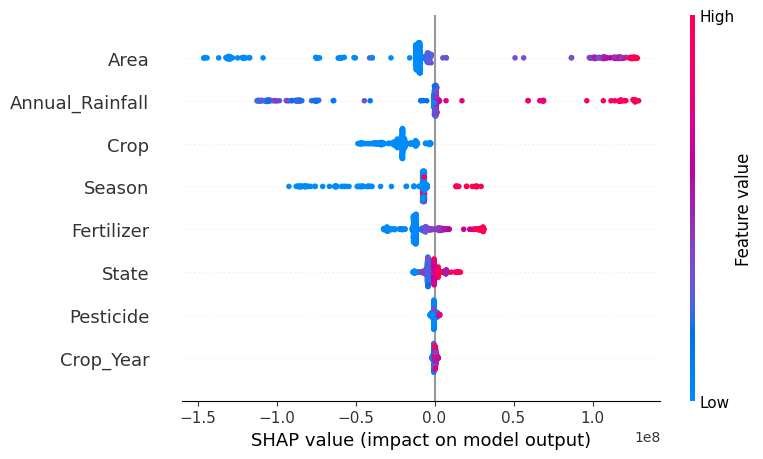

In [ ]:
# Assuming 'Crop' column is encoded and 'onion' is represented by the numerical value 1
onion_crop_code = 32  # Replace with the actual numerical code for 'onion'

# Filter the dataset for 'onion' using the numerical code
onion_data = X_train_prod[X_train_prod['Crop'] == onion_crop_code]

# Check if onion_data is still empty after applying the correct filter
if onion_data.empty:
    print("Error: onion_data is empty. Check the numerical code for 'onion' in your dataset.")
else:
    # Proceed with calculating SHAP values if onion_data is not empty:
    shap_values_onion = explainer_onion.shap_values(onion_data)

    # Visualize the SHAP summary plot for onion
    # For the plot to display 'onion' instead of the numerical code,
    # you might need to map the numerical codes back to their original labels
    # before calling shap.summary_plot.
    shap.summary_plot(shap_values_onion, onion_data)

  0%|          | 0/378 [00:00<?, ?it/s]

SHAP analysis for Cotton(lint):


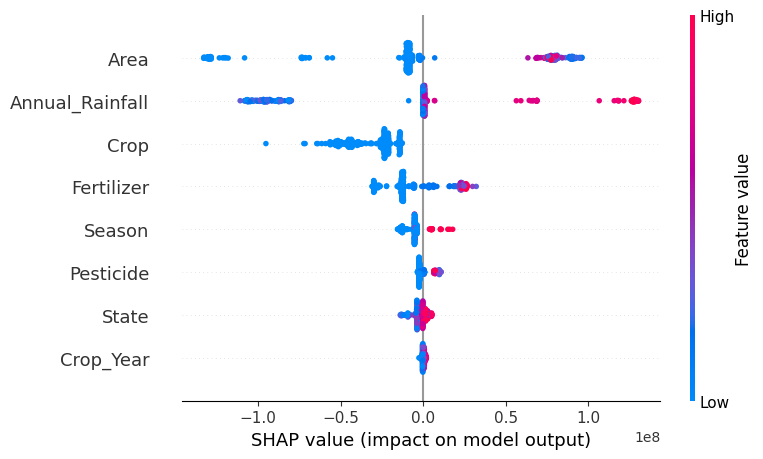

  0%|          | 0/442 [00:00<?, ?it/s]

SHAP analysis for Wheat:


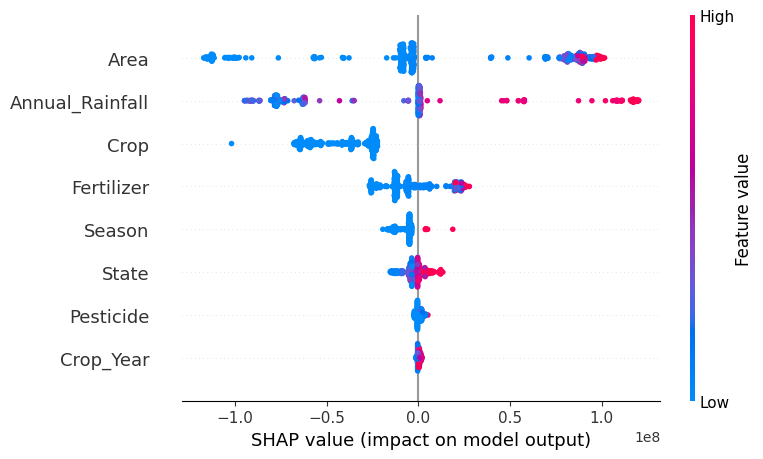

  0%|          | 0/961 [00:00<?, ?it/s]

SHAP analysis for Rice:


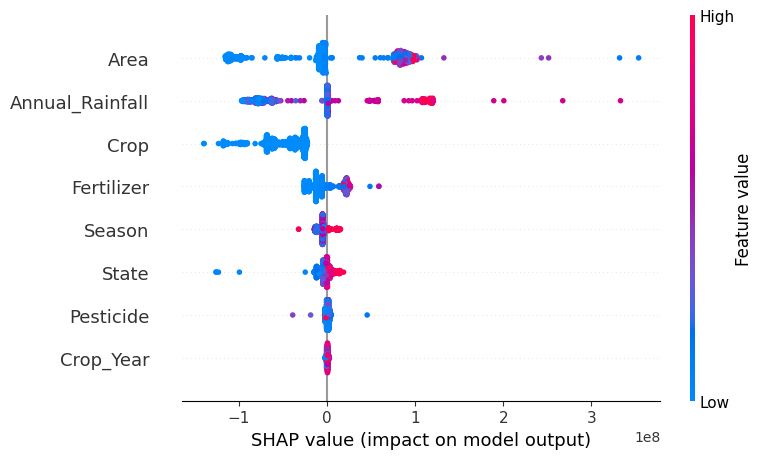

  0%|          | 0/578 [00:00<?, ?it/s]

SHAP analysis for Groundnut:


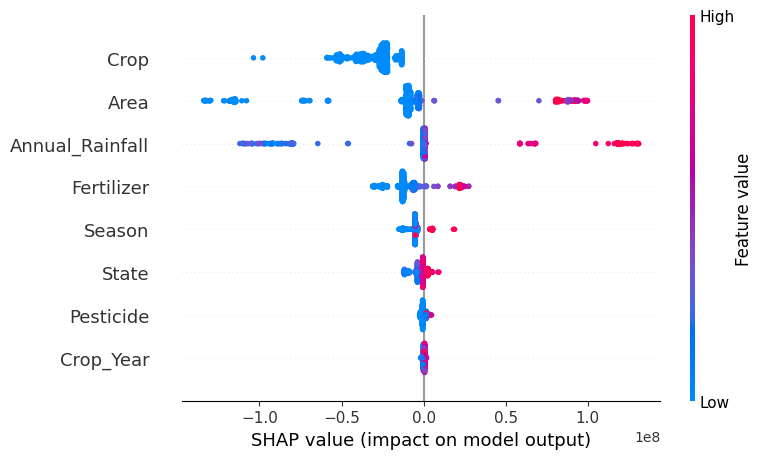

In [ ]:
# Define a list of crops you want to analyze (these are the original names before encoding)
crops = ['Cotton(lint)', 'Wheat', 'Rice', 'Groundnut']  # Add more crops as needed

# Retrieve the encoded values for the crops using the LabelEncoder
crop_encoded_values = {crop: label_encoders['Crop'].transform([crop])[0] for crop in crops}

for crop, encoded_value in crop_encoded_values.items():
    # Filter the dataset for the encoded value of the crop
    crop_data = X_train_prod[X_train_prod['Crop'] == encoded_value]

    # Calculate SHAP values for the specific crop
    shap_values_crop = explainer_onion.shap_values(crop_data)

    # Print and visualize the SHAP analysis for the current crop
    print(f"SHAP analysis for {crop}:")
    shap.summary_plot(shap_values_crop, crop_data)
